In [29]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb




In [ ]:
exemplar_df = pd.read_csv('/Users/swarchol/Research/exemplar-001/quantification/exemplar-001--unmicst_cell_umap_clusters.csv')
greg_df = pd.read_csv('/Users/swarchol/Research/bed/data/for_simon_with_umap_lean_new_columns.csv')

In [ ]:
all_data = {}


,CellID,DNA,DNA (2),DNA (3),CD3,CD45RO,DNA (4),Pan-cytokeratin,Aortic smooth muscle actin,DNA (5),...,PCNA,Collagen,X_centroid,Y_centroid,emb1,emb2,cluster_2d,UMAP_X,UMAP_Y,kmeans
0,47,15160.563636,46937.436364,42258.036364,0.235838,0.446541,24461.163636,0.270726,0.175902,29225.363636,...,0.191662,0.225750,9421.436364,1228.290909,8.872235,19.100700,-1,16034.611561,20497.943539,6
1,49,11740.781250,50723.343750,37632.750000,0.227137,0.584889,20075.703125,0.307917,0.174437,23681.062500,...,0.216768,0.214489,9460.328125,1233.937500,8.379912,20.137026,48,15764.366949,21180.248327,6
2,51,9565.513514,35690.567568,27032.162162,0.200757,0.436587,14392.621622,0.223040,0.162788,16623.810811,...,0.233341,0.120505,9475.702703,1235.189189,8.799885,19.362713,-1,15994.897394,20670.449801,4
3,52,7308.113636,24641.750000,19214.886364,0.228204,0.662923,9205.522727,0.272994,0.207245,11968.636364,...,0.226649,0.218127,9507.795455,1234.886364,8.504932,20.219538,48,15832.992590,21234.573253,5
4,53,19249.623188,57667.202899,53509.811594,0.261224,0.704192,30691.275362,0.295741,0.296045,35399.927536,...,0.219527,0.152849,9513.478261,1239.521739,8.576233,20.350970,48,15872.130942,21321.106528,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933248,1242746,18694.276596,18604.936170,17079.659574,0.248739,0.205520,6982.680851,0.136490,0.334573,9554.489362,...,0.263021,0.690389,7316.808511,26816.085106,18.186203,2.827556,72,21147.209738,9783.897947,5
933249,1242748,31240.095238,34545.301587,32678.349206,0.361773,0.381520,12513.238095,0.219673,0.126889,17597.158730,...,0.245277,0.425801,7084.936508,26818.603175,11.654654,19.720820,-1,17561.929764,20906.223217,4
933250,1242751,45004.015873,47513.269841,44139.714286,0.229271,0.467404,16901.253968,0.152905,0.283555,20190.285714,...,0.208758,0.727384,6961.650794,26820.888889,18.262630,3.071928,72,21189.161841,9944.789517,6
933251,1242753,33568.983607,35640.344262,31911.131148,0.233328,0.515689,12369.524590,0.134693,0.331565,15530.245902,...,0.195366,0.823568,6942.491803,26821.442623,19.307392,3.061911,72,21762.649778,9938.194640,4


In [32]:
# Find CellIDS for kmeans == Kluster 7
# selection_ids =  csv_df[csv_df['kmeans'] == 'Kluster 4'].CellID.values


In [33]:
all_features = [
        "ELANE",
        "CD57",
        "CD45",
        "CD11B",
        "SMA",
        "CD16",
        "ECAD",
        "FOXP3",
        "NCAM",
        "anti_CD3",
        "anti_CD45RO",
        "Keratin_570",
        "aSMA_660",
        "CD4_488",
        "CD45_PE",
        "PD1_647",
        "CD20_488",
        "CD68_555",
        "CD8a_660",
        "CD163_488",
        "FOXP3_570",
        "PDL1_647",
        "Ecad_488",
        "Vimentin_555",
        "CDX2_647",
        "LaminABC_488",
        "Desmin_555",
        "CD31_647",
        "PCNA_488",
        "CollagenIV_647",
        "CD3",
        "CD45RO",
        "Pan-cytokeratin",
        "Aortic smooth muscle actin",
        "CD4",
        "CD45",
        "PD-1",
        "CD20",
        "CD68",
        "CD8a",
        "CD163",
        "FOXP3",
        "PD-L1",
        "E-cadherin",
        "Vimentin",
        "CDX-2",
        "Lamin-A/B/C",
        "Desmin",
        "CD31",
        "PCNA",
        "Collagen",
    ]

all_features = list(set(all_features))
# Check which of the potential features are in the csv_df
potential_features = [
    feature for feature in all_features if feature in csv_df.columns
]
sel_df = csv_df.drop(
    [
        "Area",
        "MajorAxisLength",
        "MinorAxisLength",
        "Eccentricity",
        "Solidity",
        "Extent",
        "Orientation",
        "DNA_1",
        "DNA_2",
        "DNA_3",
        "DNA_4",
        "DNA_5",
        "DNA_6",
        "DNA_7",
        "DNA_8",
        "DNA_9",
        "DNA_10",
        "DNA_11",
        "DNA_12",
        "DNA_13",
    ],
    axis=1,
    errors="ignore",
)

x_df = sel_df[potential_features]



In [34]:
label_encoder = LabelEncoder()
sel_df['kmeans_encoded'] = label_encoder.fit_transform(sel_df['kmeans'])
sel_df['kmeans_encoded']
y_df = sel_df['kmeans_encoded']
feature_names = x_df.columns
forest = RandomForestClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=1)




In [35]:
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [75]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train,eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:2.08512
[1]	validation_0-mlogloss:1.95655
[2]	validation_0-mlogloss:1.86716
[3]	validation_0-mlogloss:1.79971
[4]	validation_0-mlogloss:1.74648
[5]	validation_0-mlogloss:1.70531
[6]	validation_0-mlogloss:1.67158
[7]	validation_0-mlogloss:1.64393
[8]	validation_0-mlogloss:1.62009
[9]	validation_0-mlogloss:1.59997
[10]	validation_0-mlogloss:1.58304
[11]	validation_0-mlogloss:1.56792
[12]	validation_0-mlogloss:1.55437
[13]	validation_0-mlogloss:1.54273
[14]	validation_0-mlogloss:1.53359
[15]	validation_0-mlogloss:1.52438
[16]	validation_0-mlogloss:1.51613
[17]	validation_0-mlogloss:1.50924
[18]	validation_0-mlogloss:1.50299
[19]	validation_0-mlogloss:1.49695
[20]	validation_0-mlogloss:1.49177
[21]	validation_0-mlogloss:1.48659
[22]	validation_0-mlogloss:1.48199
[23]	validation_0-mlogloss:1.47795
[24]	validation_0-mlogloss:1.47345
[25]	validation_0-mlogloss:1.46963
[26]	validation_0-mlogloss:1.46618
[27]	validation_0-mlogloss:1.46281
[28]	validation_0-mlogloss:1.4

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
explainer = shap.Explainer(clf)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0])

In [77]:
shap_values = explainer(X_test)


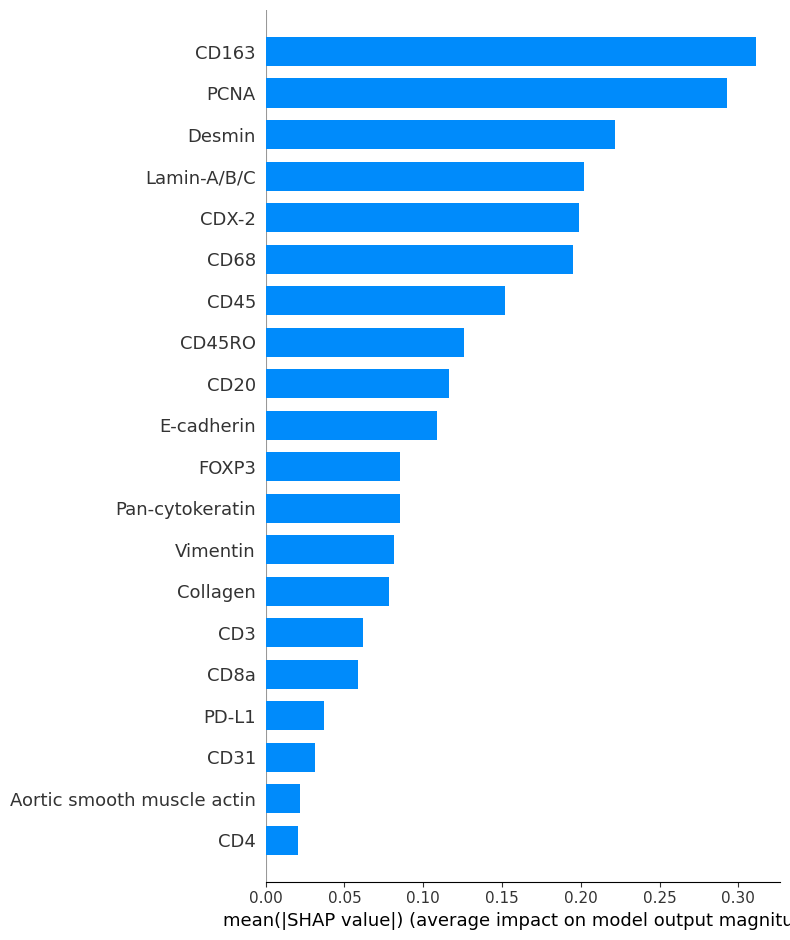

In [78]:
shap.summary_plot(shap_values[:,:,9], X_test, plot_type='bar')


(21,) (21,)


<BarContainer object of 21 artists>

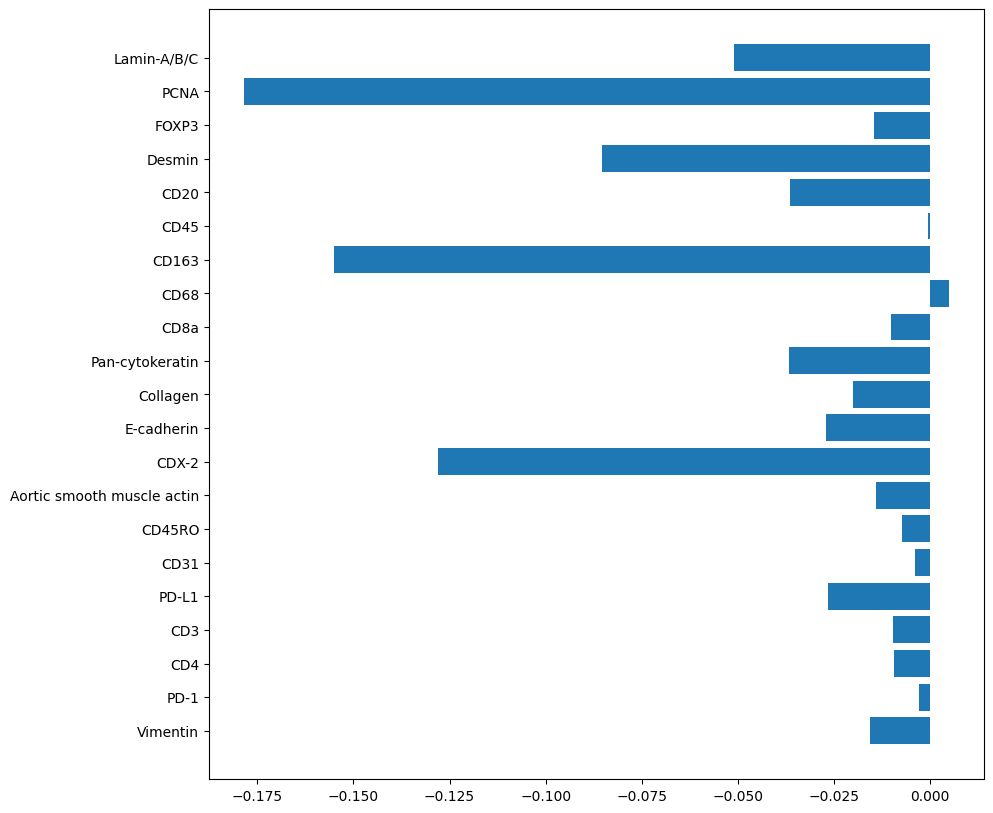

In [81]:
means = shap_values.values[:,:,0].mean(0)
columns = X_test.columns
print(means.shape, columns.shape)
# Plot the SHAP values for the first class as a bar plot
plt.figure(figsize=(10, 10))
plt.barh(columns, means)


In [60]:
means

.values =
array([-0.01570892, -0.00297455, -0.00943356, -0.00959339, -0.02651753,
       -0.00379566, -0.00726952, -0.01416779, -0.12805028, -0.02703274,
       -0.02015047, -0.03663412, -0.01019286,  0.00488256, -0.15501052,
       -0.00039288, -0.03639427, -0.08542522, -0.01459888, -0.17843516,
       -0.05103267], dtype=float32)

.base_values =
0.9791814

.data =
array([0.23884119, 0.22515563, 0.40366963, 0.3364545 , 0.20768456,
       0.16569957, 0.40129696, 0.2632256 , 0.57101961, 0.44018425,
       0.35188053, 0.45603301, 0.27936143, 0.17944684, 0.27206548,
       0.33813828, 0.27053351, 0.25376452, 0.16848686, 0.46576444,
       0.50990658])

In [53]:
columns.shape

(21,)

In [23]:
y_pred = forest.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.35      0.33      0.34       272
           1       0.28      0.25      0.26       272
           2       0.30      0.31      0.30       169
           3       0.25      0.25      0.25       276
           4       0.26      0.22      0.24       289
           5       0.25      0.27      0.26       220
           6       0.48      0.59      0.53       176
           7       0.21      0.27      0.24       179
           8       0.25      0.22      0.23       297
           9       0.85      0.88      0.87        84

    accuracy                           0.31      2234
   macro avg       0.35      0.36      0.35      2234
weighted avg       0.31      0.31      0.31      2234



In [24]:
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.35      0.29      0.32       307
           1       0.22      0.22      0.22       242
           2       0.36      0.34      0.35       185
           3       0.18      0.25      0.21       202
           4       0.23      0.25      0.24       233
           5       0.32      0.28      0.30       274
           6       0.48      0.53      0.50       199
           7       0.27      0.30      0.28       202
           8       0.26      0.22      0.24       303
           9       0.83      0.83      0.83        87

    accuracy                           0.31      2234
   macro avg       0.35      0.35      0.35      2234
weighted avg       0.32      0.31      0.31      2234



test = shap.kmeans()

In [ ]:
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap_values = explainer.kmeans(X_train, 50)

In [79]:
X_test

,ELANE,NCAM,SMA,CD11B,CD57,FOXP3,CD45,CD16,ECAD
10348,1347.045455,907.477273,2908.613636,1136.840909,303.818182,331.818182,684.295455,578.090909,1074.295455
2943,1554.214815,926.548148,1084.311111,1287.992593,243.474074,379.348148,1849.362963,402.385185,1302.237037
9986,1196.980000,878.570000,1106.640000,698.500000,253.740000,2156.540000,1166.030000,353.960000,1043.630000
1060,1597.896552,930.732759,3096.948276,1056.491379,241.327586,449.913793,682.327586,391.439655,1425.318966
10345,1171.390244,891.902439,3098.243902,838.390244,233.926829,258.878049,292.390244,345.536585,925.439024
...,...,...,...,...,...,...,...,...,...
1668,1509.285714,906.948052,1946.324675,1184.493506,170.753247,337.610390,1281.207792,363.272727,1172.883117
10412,1260.120000,894.920000,4203.800000,776.080000,446.760000,356.680000,335.120000,453.880000,1174.000000
1117,1327.153846,890.346154,573.884615,2918.076923,224.846154,363.903846,894.269231,522.615385,1179.576923
8256,1825.577778,1011.288889,1695.777778,1010.600000,528.911111,839.555556,1092.911111,516.444444,1766.933333


In [80]:
print(f"shap_values shape: {shap_values.shape}")
print(f"X_test shape: {X_test.shape}")

shap_values shape: (2234, 9, 10)
X_test shape: (2234, 9)


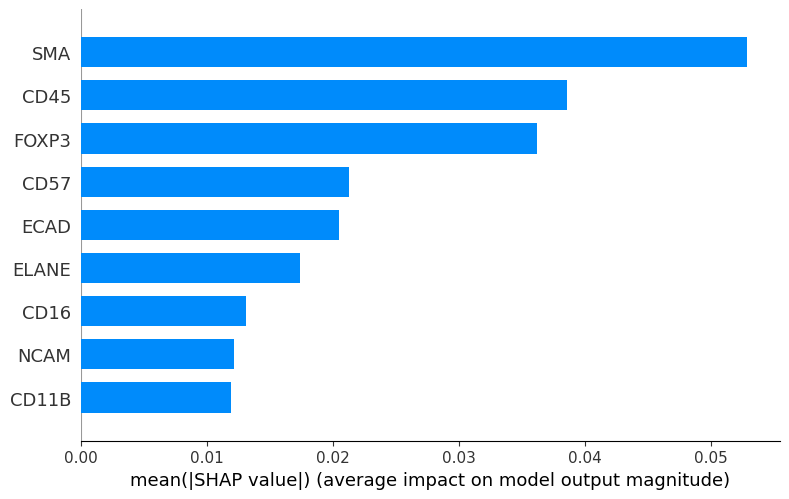

In [96]:
shap.summary_plot(shap_values[:,:,0], X_test, plot_type='bar')


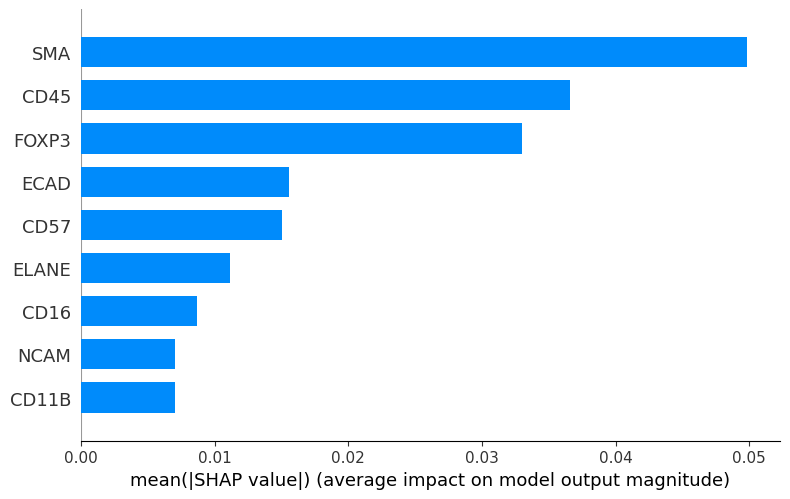

In [81]:

shap.summary_plot(shap_values[:,:,0], X_test, plot_type='bar')


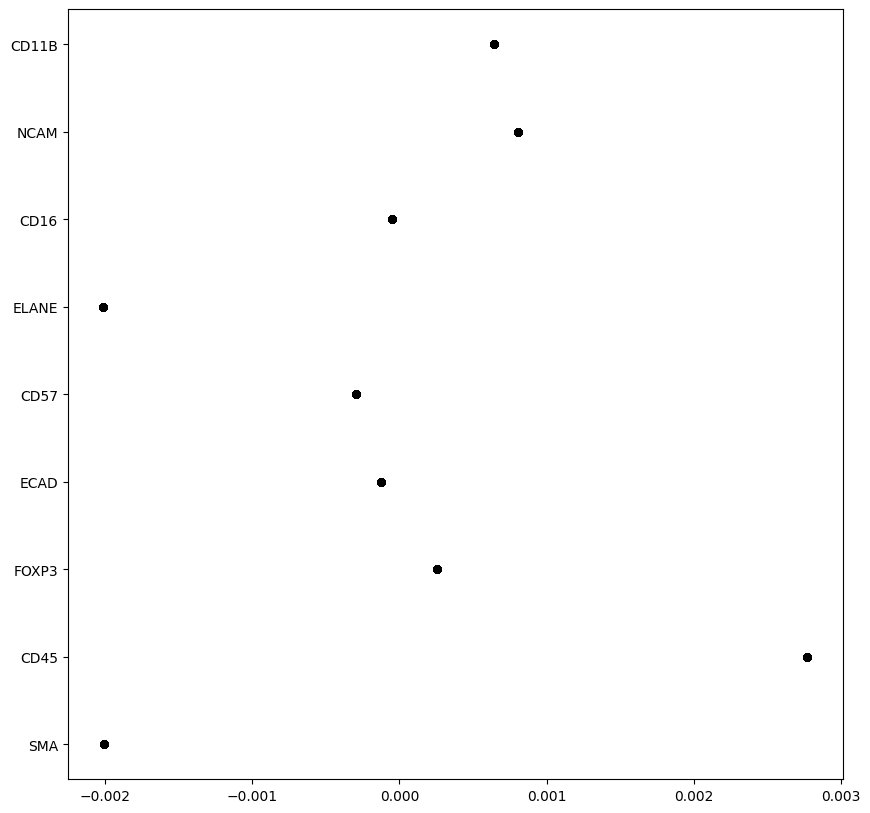

In [94]:
X_test.shape
# Calculate the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values[:,:,0]), axis=0)
# Get the sorted indices based on mean absolute SHAP values
sorted_indices = np.argsort(mean_abs_shap_values)[::-1]
# Sort the feature names based on the sorted indices
sorted_feature_names = feature_names[sorted_indices]

# Plot this 2234x9 matrix as 9 dot plots with matplotlib
fig, ax = plt.subplots(figsize=(10,10))
for i in range(shap_values[:,:,0].shape[1]):
    sorted_index = sorted_indices[i]
    ax.plot(np.mean(shap_values[:,sorted_index,0])*np.ones(shap_values.shape[0]), i*np.ones(shap_values.shape[0]), 'o', markersize=5, color='black')
    ax.set_yticks(range(shap_values[:,:,0].shape[1]))
    ax.set_yticklabels(sorted_feature_names)

In [93]:
mean_abs_shap_values[6]
# feature_names

0.036592577871471015

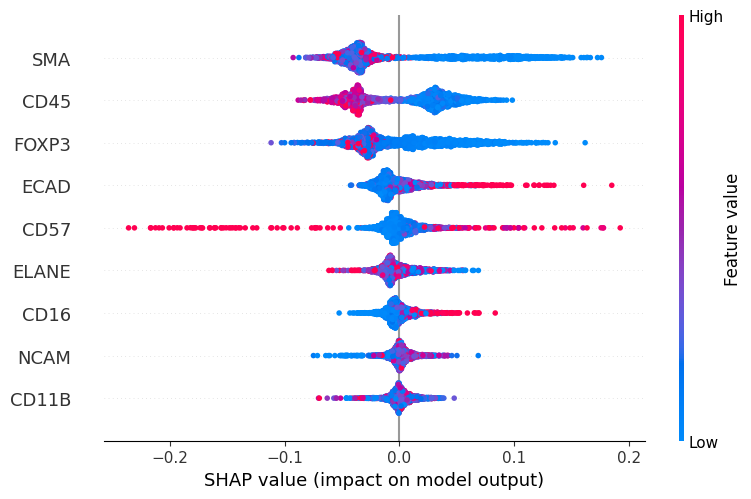

In [84]:

shap.summary_plot(shap_values[:,:,0], X_test)


In [85]:
# Map label_encoder index to label
label_encoder.classes_

array(['Kluster 0', 'Kluster 1', 'Kluster 2', 'Kluster 3', 'Kluster 4',
       'Kluster 5', 'Kluster 6', 'Kluster 7', 'Kluster 8', 'Kluster 9'],
      dtype=object)